In [30]:
import pandas as pd
import numpy as np

In [60]:
df=pd.read_csv('cleaned_data.csv')

In [61]:
df.head()

,Persistency_Flag,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Ntm_Speciality_labels,Ntm_Specialist_Flag_labels,Ntm_Speciality_Bucket_labels,Risk_Segment_Prior_Ntm_labels,Tscore_Bucket_Prior_Ntm_labels,Risk_Segment_During_Rx_labels,Tscore_Bucket_During_Rx_labels,Change_T_Score_labels,Change_Risk_Segment_labels,Adherent_Flag_labels
0,Persistent,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,5.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,1,...,5.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,0,0,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Non-Persistent,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,1,1,...,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [70]:

cat_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)[['Persistency_Flag']]



In [32]:
pd.set_option('display.max_rows', None)

In [71]:
np.abs(cat_corr).sort_values(by=['Persistency_Flag'], ascending=False)

,Persistency_Flag
Persistency_Flag,1.000000
Persistency_Flag_labels,1.000000
Comorb_Long_Term_Current_Drug_Therapy,0.290018
"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",0.247497
Comorb_Encounter_For_Immunization,0.239352
Concom_Viral_Vaccines,0.238560
Concom_Systemic_Corticosteroids_Plain,0.234913
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,0.206096
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,0.202076
Concom_Cephalosporins,0.196740


In [38]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"



Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Hypothesis1 Effects of Demographics on persistency of drugs

<AxesSubplot:xlabel='Age_Bucket', ylabel='count'>

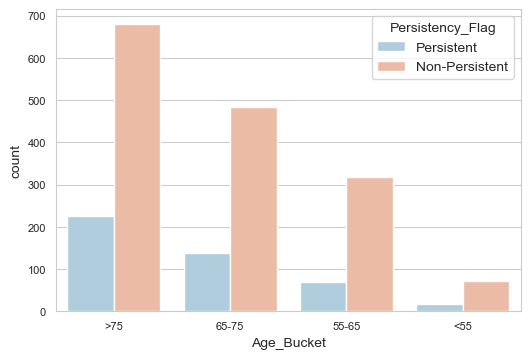

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Age_Bucket',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result Older patients are more persistent

<AxesSubplot:xlabel='Region', ylabel='count'>

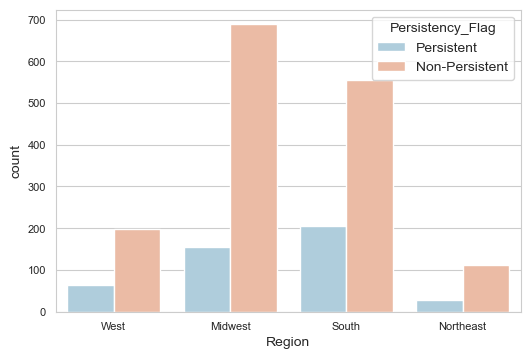

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Region',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result : People from south is more Persistent followed by midwest

####  IDNs are large healthcare delivery organizations that either own or manage multiple points of patient care - from hospitals to physician practices to long term care facilities, and everything in between. 

<AxesSubplot:xlabel='Idn_Indicator', ylabel='count'>

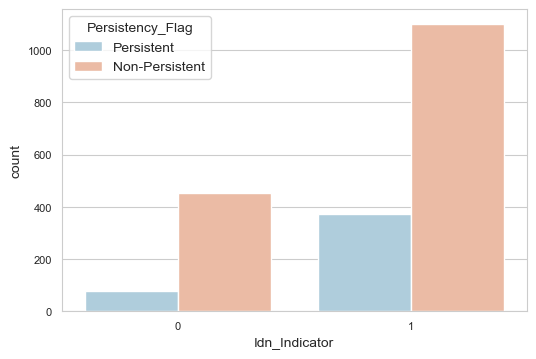

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Idn_Indicator',hue='Persistency_Flag',data=df,palette='RdBu_r')

### Result: Patients associated with IDN are more persistent as compared to others

## Hypothesis2 Effects of provider attributes on the persistency 

<AxesSubplot:xlabel='Ntm_Speciality', ylabel='count'>

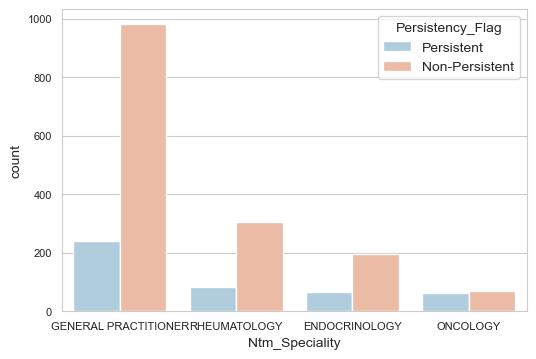

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='Ntm_Speciality',hue='Persistency_Flag',data=df,palette='RdBu_r')

#### Visualizing as percentage

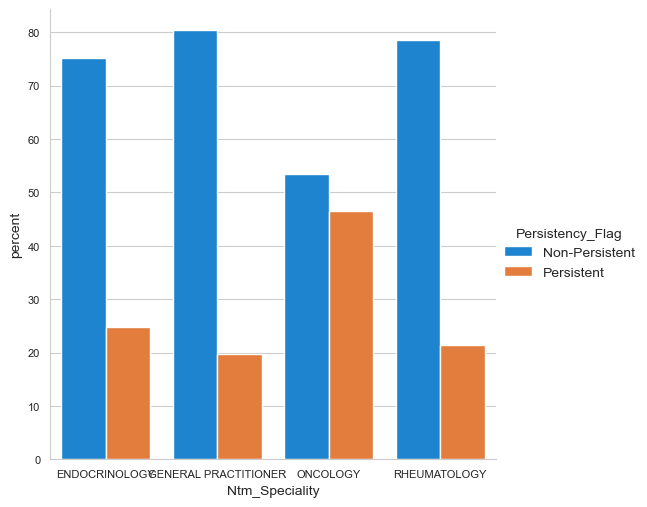

In [81]:
x,y = 'Ntm_Speciality', 'Persistency_Flag'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

### Result 2: Oncology followed by Endocrinology drugs are more persistent
#### In general terms Cancer patients are more persistent in nature followed by diabetes and thyroid patient